In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
ls

Decision tree.ipynb
Fitting with Larch lib.ipynb
GaussianProcessRegression_fitcurve.ipynb
Larch/
Multi_Gaussin_try.ipynb
RF_10000data_derivate.ipynb
Untitled Folder/
XANES_ML_Data.xlsx
__ init __.py
first_second_derivate_CN_10000average_spectra.csv
model_training.ipynb
multiple_peak_deconvolution.ipynb
predict_CN_10000sample.ipynb
predict_descriptors.ipynb
sample_spectrum.csv


In [95]:
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.metrics import r2_score

In [96]:
df = pd.read_csv("first_second_derivate_CN_10000average_spectra.csv")
df = df.drop(columns = 'Unnamed: 0')

In [97]:
df.head()

,first_derivate1,first_derivate2,first_derivate3,first_derivate4,first_derivate5,first_derivate6,first_derivate7,first_derivate8,first_derivate9,first_derivate10,...,second_derivate92,second_derivate93,second_derivate94,second_derivate95,second_derivate96,second_derivate97,second_derivate98,second_derivate99,second_derivate100,CN
0,0.003164,0.003039,0.003061,0.003229,0.003543,0.004004,0.004612,0.005366,0.006282,0.007467,...,0.000135,0.000152,0.000168,0.000185,0.000202,0.000219,0.000235,-0.001988,0.0,9.118123
1,0.003099,0.002962,0.002964,0.003106,0.003388,0.003809,0.004370,0.005071,0.005919,0.007004,...,0.000506,0.000534,0.000562,0.000589,0.000617,0.000644,0.000672,-0.008119,0.0,9.982105
2,0.003077,0.002946,0.002954,0.003098,0.003381,0.003801,0.004359,0.005054,0.005896,0.006973,...,0.000464,0.000475,0.000486,0.000497,0.000508,0.000519,0.000530,-0.007733,0.0,9.999510
3,0.003110,0.002975,0.002980,0.003126,0.003412,0.003839,0.004406,0.005113,0.005972,0.007069,...,0.000301,0.000338,0.000374,0.000410,0.000447,0.000483,0.000519,-0.004295,0.0,9.739154
4,0.003052,0.002928,0.002942,0.003093,0.003381,0.003807,0.004369,0.005069,0.005917,0.007007,...,0.000358,0.000431,0.000505,0.000578,0.000651,0.000724,0.000797,-0.005440,0.0,9.736296


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
def DecisionTreeRegression(max_depth, X_train, X_test, y_train, y_test):
    clf = DecisionTreeRegressor(max_depth = max_depth)
    clf = clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    MSE = ((y_pred-y_test)**2).mean()
    print("MSE = " , MSE)
    print('R-squared of training data is', clf.score(X_train, y_train))
    print('R-squared of testing data is' , clf.score(X_test, y_test))
    
    
    
    fig, axs = plt.subplots(1,1,figsize=(12,12))
    axs.scatter(clf.predict(X_test), y_test)
    axs.plot(np.linspace(8,12), np.linspace(8,12))
    axs.set_xlabel('Predicted_test')
    axs.set_ylabel('Actual_test')

    

In [100]:
# first & second derivates
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'CN'], df['CN'], test_size = 0.25, random_state = 42)

MSE =  0.01866768435954578
R-squared of training data is 0.9715334974733519
R-squared of testing data is 0.9010354213789304


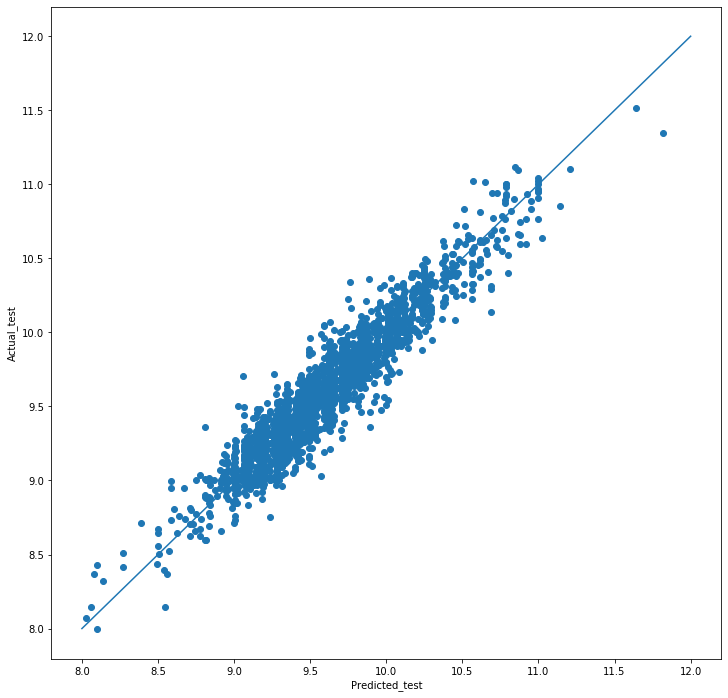

In [124]:
DecisionTreeRegression(12, X_train, X_test, y_train, y_test)

In [102]:
# only first derivatives case
feature = df.iloc[:, 0:100]
label = df['CN']
first_X_train, first_X_test, first_y_train, first_y_test = train_test_split(feature, label, test_size = 0.25, random_state = 42)

MSE =  0.033516139873982546
R-squared of training data is 0.93251874551037
R-squared of testing data is 0.8223180446086025


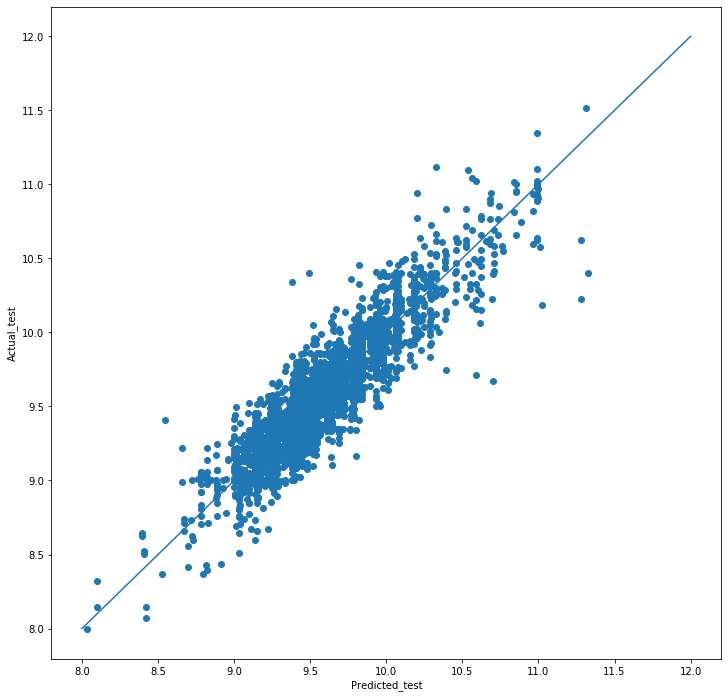

In [121]:
DecisionTreeRegression(10, first_X_train, first_X_test, first_y_train, first_y_test)

In [104]:
# only sec derivatives case
feature = df.iloc[:, 100:200]
label = df['CN']
sec_X_train, sec_X_test, sec_y_train, sec_y_test = train_test_split(feature, label, test_size = 0.25, random_state = 42)

MSE =  0.019438258172482632
R-squared of training data is 0.9506925537929143
R-squared of testing data is 0.8969503130588551


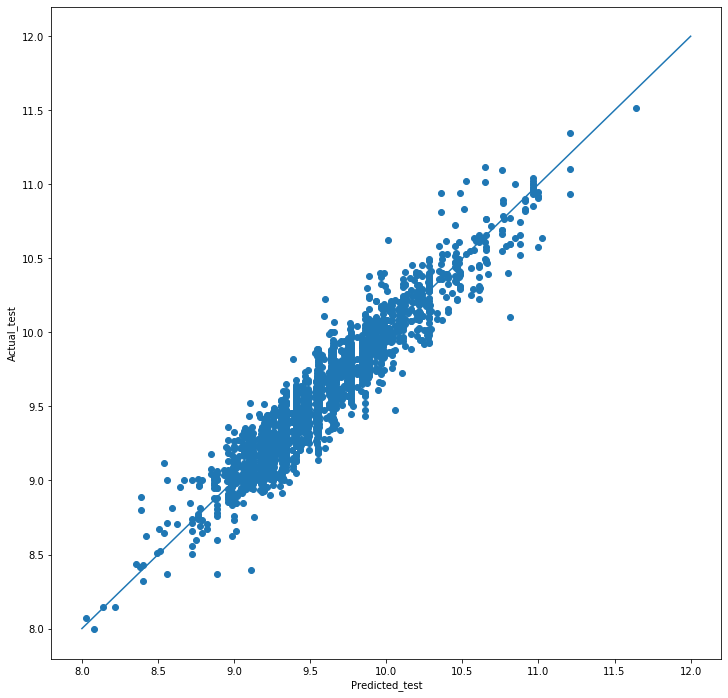

In [105]:
DecisionTreeRegression(10, sec_X_train, sec_X_test, sec_y_train, sec_y_test)

In [108]:
mu_df = pd.read_csv('mu10000.csv')

In [109]:
mu_df

,CN,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,Mu8,Mu9,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.118123,0.031128,0.033685,0.036141,0.038614,0.041223,0.044086,0.047322,0.051048,0.055384,...,1.006451,1.006826,1.007279,1.007820,1.008459,1.009209,1.010079,1.011081,1.012226,1.013524
1,9.982105,0.030359,0.032863,0.035257,0.037652,0.040162,0.042900,0.045978,0.049510,0.053607,...,0.990334,0.992630,0.995239,0.998179,1.001467,1.005122,1.009162,1.013604,1.018468,1.023769
2,9.999510,0.030369,0.032855,0.035236,0.037623,0.040127,0.042859,0.045930,0.049452,0.053537,...,0.994056,0.996536,0.999312,1.002392,1.005782,1.009490,1.013522,1.017886,1.022590,1.027639
3,9.739154,0.030461,0.032974,0.035378,0.037786,0.040312,0.043069,0.046171,0.049731,0.053863,...,1.001889,1.002645,1.003574,1.004699,1.006045,1.007635,1.009494,1.011643,1.014109,1.016913
4,9.736296,0.030375,0.032841,0.035208,0.037585,0.040085,0.042817,0.045893,0.049424,0.053520,...,0.997625,0.998350,0.999261,1.000406,1.001833,1.003589,1.005722,1.008281,1.011312,1.014864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.141965,0.030467,0.032891,0.035230,0.037590,0.040081,0.042811,0.045888,0.049421,0.053517,...,1.007059,1.006536,1.006068,1.005712,1.005527,1.005574,1.005910,1.006595,1.007687,1.009246
9996,9.721995,0.030587,0.033079,0.035471,0.037874,0.040401,0.043163,0.046274,0.049843,0.053985,...,0.994157,0.997098,1.000359,1.003936,1.007828,1.012035,1.016554,1.021383,1.026521,1.031967
9997,9.335612,0.031082,0.033661,0.036129,0.038608,0.041217,0.044078,0.047311,0.051039,0.055381,...,1.001893,1.000900,0.999983,0.999175,0.998510,0.998019,0.997736,0.997696,0.997929,0.998471
9998,9.087615,0.031005,0.033524,0.035947,0.038390,0.040969,0.043799,0.046996,0.050677,0.054956,...,0.999137,0.999958,1.000910,1.002006,1.003256,1.004673,1.006269,1.008056,1.010046,1.012250


In [110]:
# only sec derivatives case
feature = mu_df.iloc[:, 1:]
label = mu_df['CN']
mu_X_train, mu_X_test, mu_y_train, mu_y_test = train_test_split(feature, label, test_size = 0.25, random_state = 42)

MSE =  0.018946181951778062
R-squared of training data is 0.9688706505921726
R-squared of testing data is 0.8995589984690819


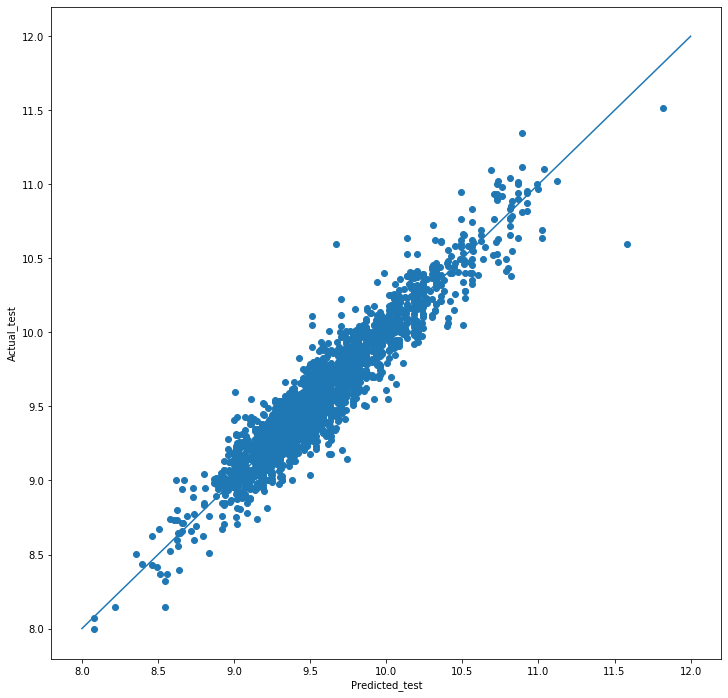

In [113]:
DecisionTreeRegression(10, mu_X_train, mu_X_test, mu_y_train, mu_y_test)